In [35]:
import math

import cv2
import numpy
import matplotlib.pyplot as plt

import copy


## FAST

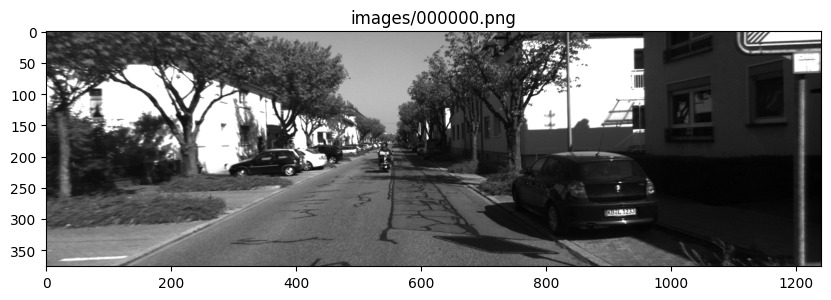

In [2]:
fast_image_file = "images/000000.png"

fast_image = cv2.imread(fast_image_file, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 8))
plt.imshow(fast_image, cmap='gray')
plt.title(fast_image_file)
plt.show()

fast_kps size: 2879


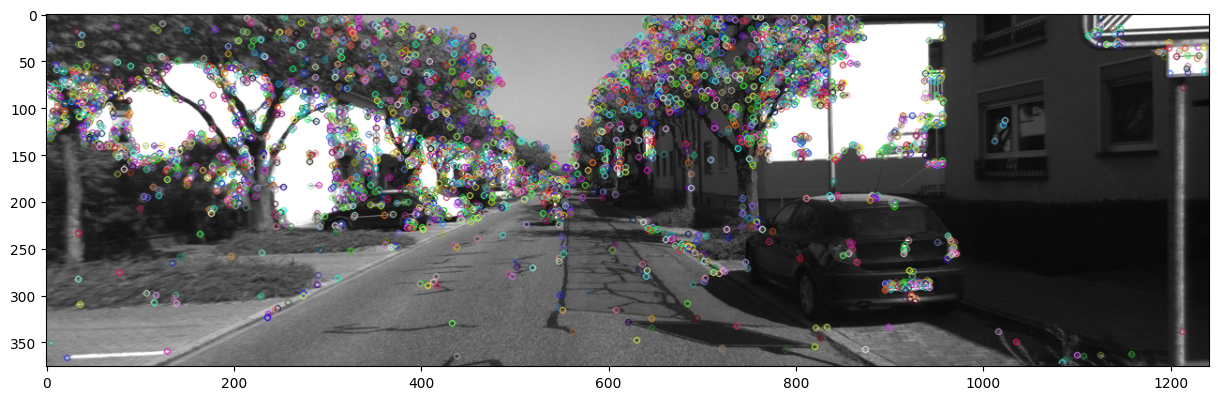

In [3]:
fast = cv2.FastFeatureDetector.create(threshold=30, nonmaxSuppression=True)

fast_kps = fast.detect(fast_image, None)
print(f"fast_kps size: {len(fast_kps)}")

fast_kp_image = cv2.drawKeypoints(fast_image, fast_kps, None)

plt.figure(figsize=(15, 10))
plt.imshow(fast_kp_image)
plt.show()

In [4]:

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(fast_kps)) )

Threshold: 30
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 2879


## ORB

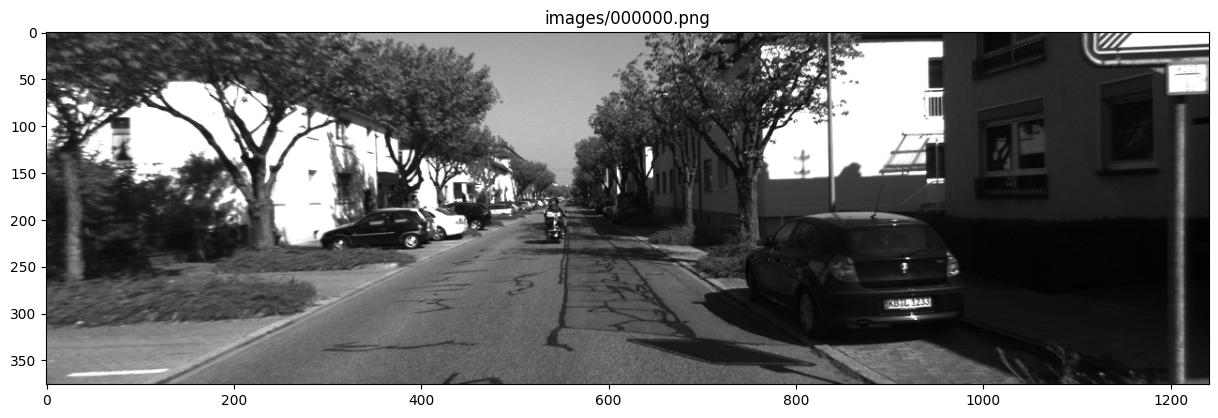

In [5]:
orb_image_file = "images/000000.png"

orb_image = cv2.imread(orb_image_file, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 10))
plt.imshow(orb_image, cmap='gray')
plt.title(orb_image_file)
plt.show()

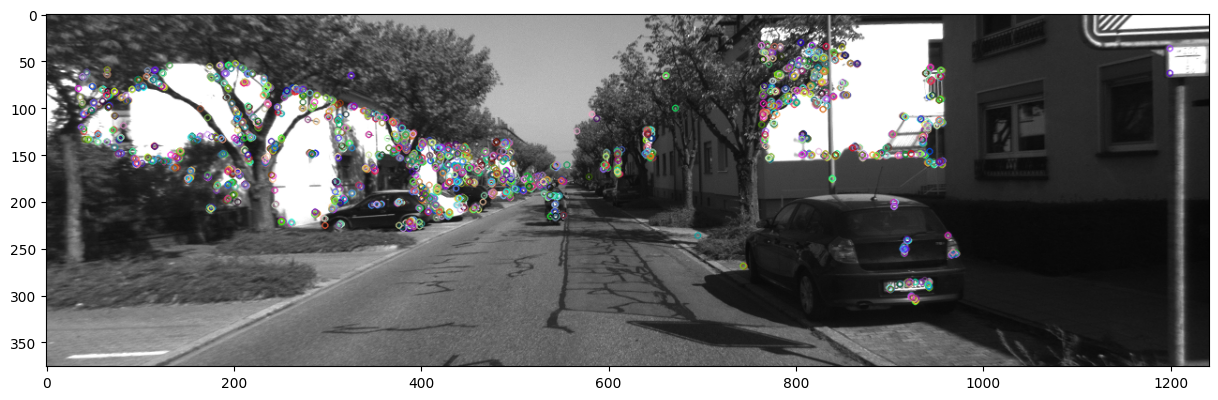

In [110]:
orb = cv2.ORB.create(nfeatures=2000,
                     scaleFactor=1.2,
                     nlevels=8,
                     edgeThreshold=31,
                     firstLevel=0,
                     WTA_K=2,
                    #  scoreType=cv2.ORB_HARRIS_SCORE,
                     scoreType=cv2.ORB_FAST_SCORE,
                     patchSize=31,
                     fastThreshold=20)

kps = orb.detect(orb_image)

kp_image = cv2.drawKeypoints(orb_image, kps, None)

plt.figure(figsize=(15, 10))
plt.imshow(kp_image)
plt.show()

In [7]:
for kp in kps:
    print(kp.octave, kp.response)

0 0.0034383719321340322
0 0.005556413903832436
0 0.003957301843911409
0 0.005212435033172369
0 0.004706856794655323
0 0.006056131795048714
0 0.004043682012706995
0 0.006771974731236696
0 0.0051782699301838875
0 0.003925522789359093
0 0.0038830924313515425
0 0.004475781694054604
0 0.005493238102644682
0 0.00556187005713582
0 0.003513509640470147
0 0.006303607020527124
0 0.007196921389549971
0 0.004383224993944168
0 0.00854711327701807
0 0.006289337296038866
0 0.006274385843425989
0 0.006180830765515566
0 0.0037830150686204433
0 0.004389963578432798
0 0.007550341077148914
0 0.008293787948787212
0 0.006560601759701967
0 0.003718357300385833
0 0.0070739444345235825
0 0.006988430395722389
0 0.005765748675912619
0 0.005100922659039497
0 0.006926490925252438
0 0.006680218502879143
0 0.005549947265535593
0 0.006014565471559763
0 0.010651811957359314
0 0.006903236266225576
0 0.005275601986795664
0 0.00536285201087594
0 0.0041093649342656136
0 0.005037854425609112
0 0.007279874291270971
0 0.0039

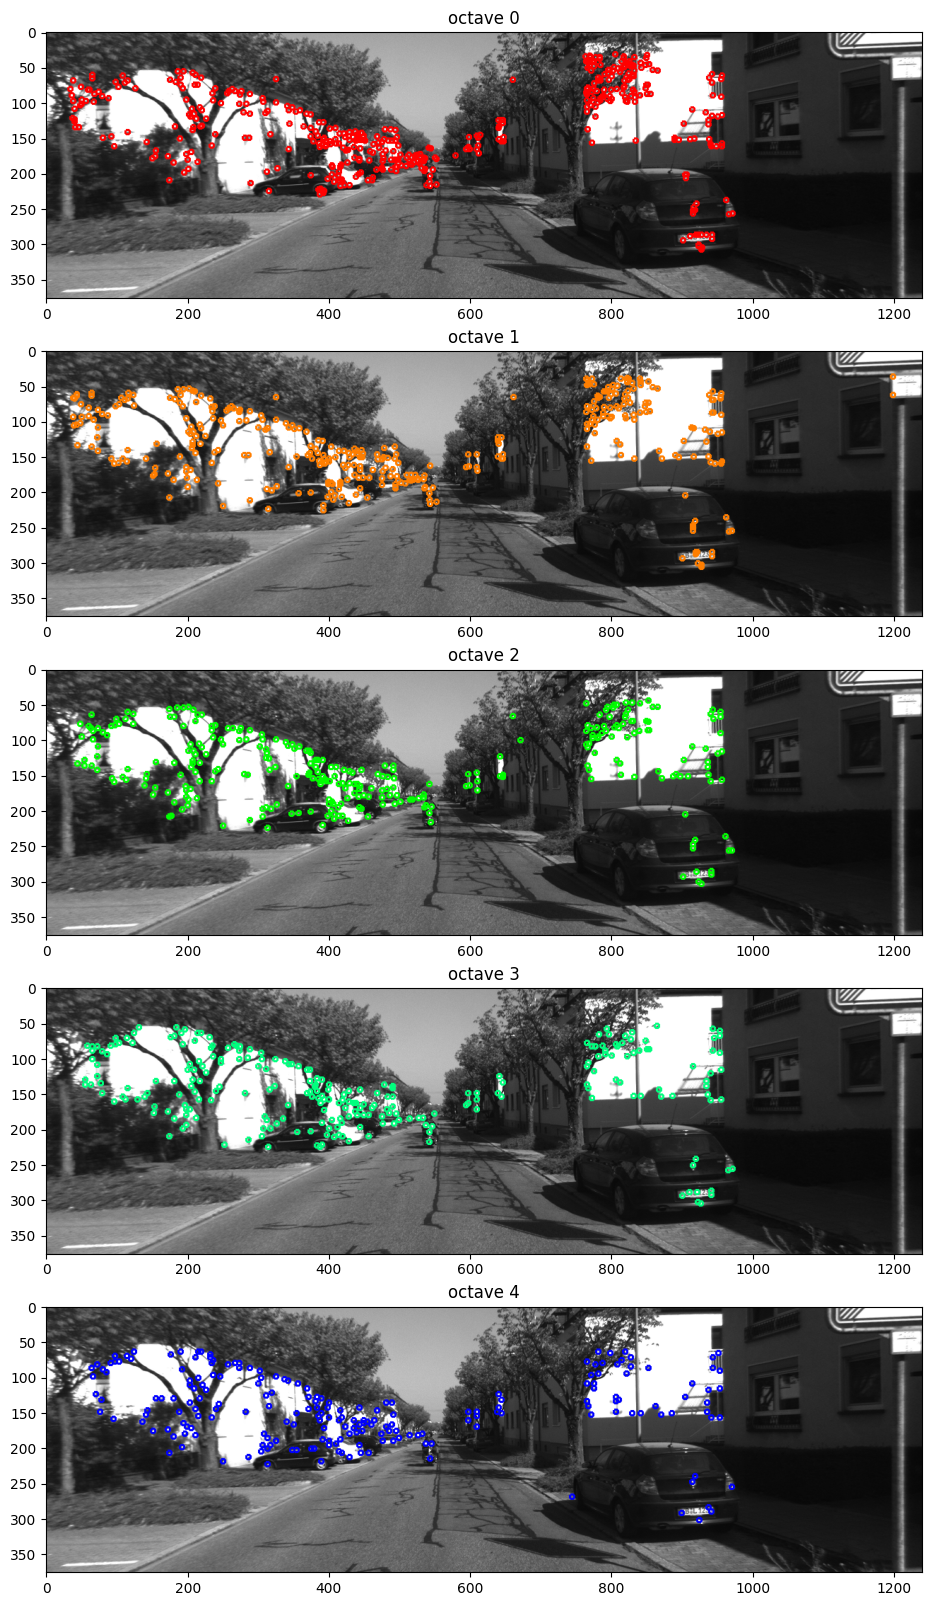

In [113]:
kps_level = [[] for i in range(8)]

for kp in kps:
    kps_level[kp.octave].append(kp)

colors = [(255, 0, 0), (255, 126, 0), (0, 255, 0), (0, 255, 126), (0, 0, 255)]

kp_image = orb_image.copy()
kp_image = cv2.cvtColor(kp_image, cv2.COLOR_GRAY2RGB)
kp_images = []

idx = 0
for elem in kps_level[:5]:
    kp_image_temp = kp_image.copy()
    for kp in elem:
        cv2.circle(kp_image_temp, (int(kp.pt[0]), int(kp.pt[1])), 3, colors[idx], 2)

    kp_images.append(kp_image_temp)
    idx += 1

# kp_image = cv2.cvtColor(kp_image, cv2.COLOR_BGR2RGB)v
# plt.figure(figsize=(15, 10))
fig, axs = plt.subplots(len(kp_images), 1, figsize=(30, 20))
for i in range(len(kp_images)):
    axs[i].imshow(kp_images[i])
    axs[i].set_title(f"octave {i}")

# plt.imshow(kp_image)
plt.show()

### copy boarder

(476, 1341)
(376, 1241)


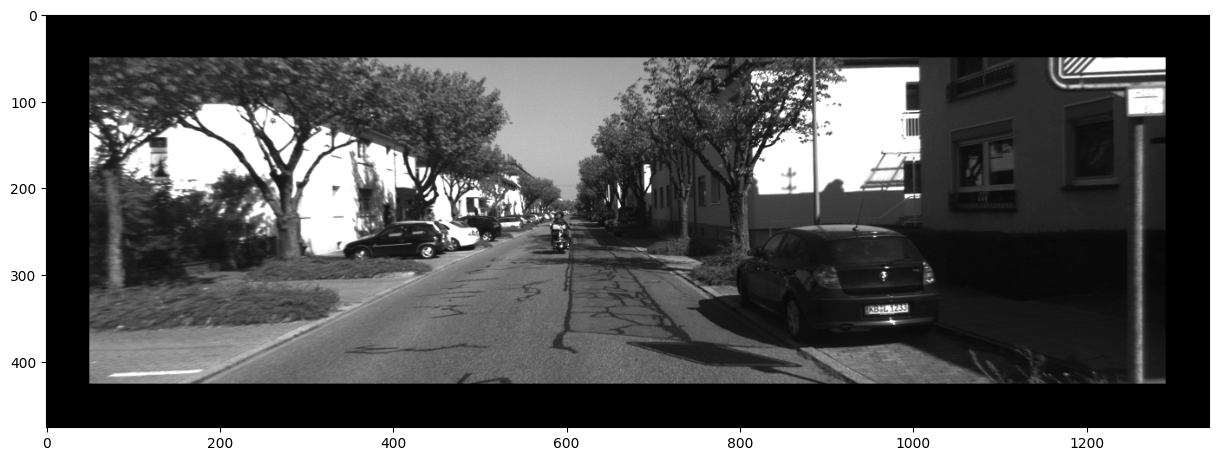

In [9]:
image_temp = orb_image.copy()

border = 50

border_image_temp = cv2.copyMakeBorder(image_temp, border, border, border, border, cv2.BORDER_CONSTANT)

print(border_image_temp.shape)
print(image_temp.shape)

plt.figure(figsize=(15, 10))
plt.imshow(border_image_temp, cmap='gray')
plt.show()

### Pyramid

base_image.shape: (376, 1241)


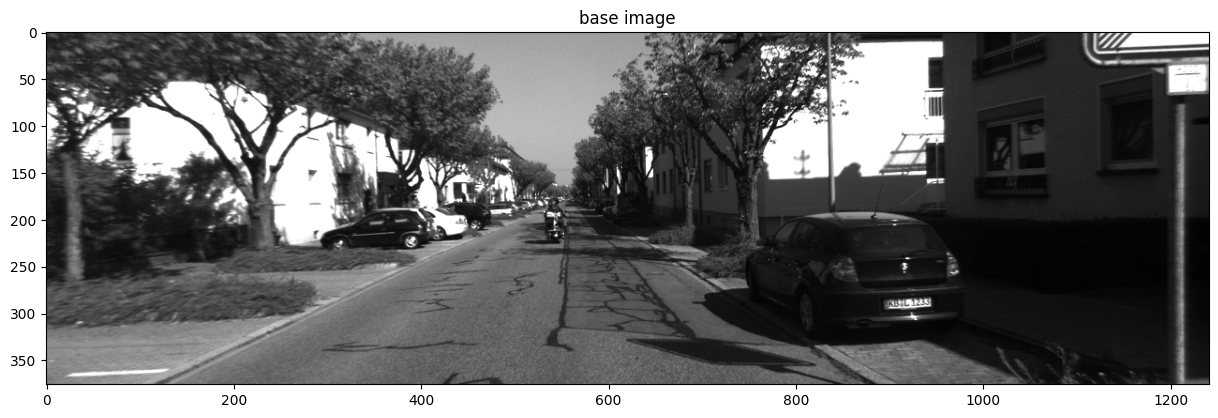

In [10]:
# parameters
pyramid_levels = 3
scale_factor = 1.2
scale = 1.0 / scale_factor
edge_threshold = 19

# initialize
image_pyramids = [[] for i in range(pyramid_levels)]
base_image = orb_image.copy()

print("base_image.shape:", base_image.shape)


plt.figure(figsize=(15,10))
plt.imshow(image_temp, cmap='gray')
plt.title("base image")
plt.show()

sz: (1034, 313)
resized_image.shape: (313, 1034)
sz: (862, 261)
resized_image.shape: (261, 862)


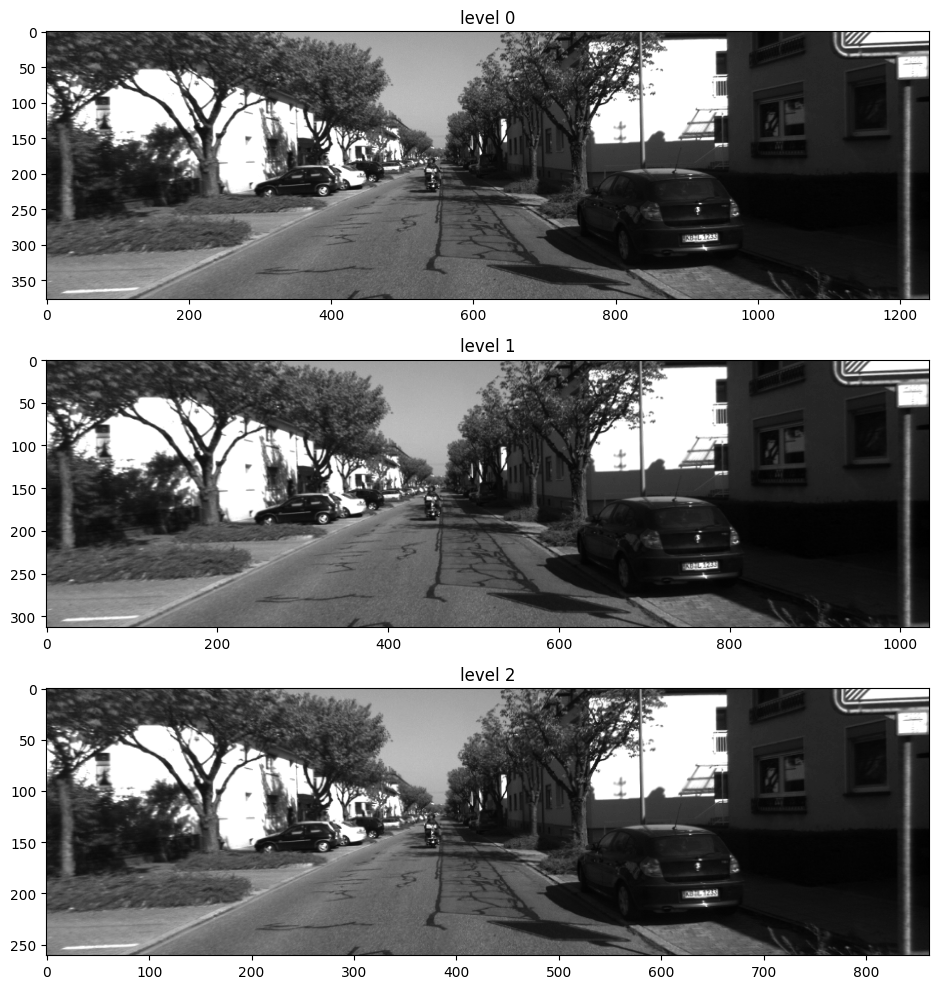

In [11]:
# make pyramid
# np.ndarray.shape : (row, col)
# cv2.resize shape : (width, height)
sz_list = [base_image.shape[::-1]]
pyramid_images = [base_image.copy()]

for level in range(pyramid_levels-1):
    # size
    sz = (round(sz_list[level][0]*scale), round(sz_list[level][1]*scale))
    sz_list.append(sz)
    print("sz:", sz)

    # resized image
    resized_image = cv2.resize(base_image, sz)
    pyramid_images.append(resized_image)
    print("resized_image.shape:", resized_image.shape)


# Plot
fig, axs = plt.subplots(pyramid_levels, 1, figsize=(15,10))

for i in range(pyramid_levels):
    axs[i].imshow(pyramid_images[i], cmap='gray')
    axs[i].set_title(f"level {i}")
plt.tight_layout()
plt.show()

edge_threshold: 19
pyramid_image_border.shape: (414, 1279)
pyramid_image_border.shape: (351, 1072)
pyramid_image_border.shape: (299, 900)


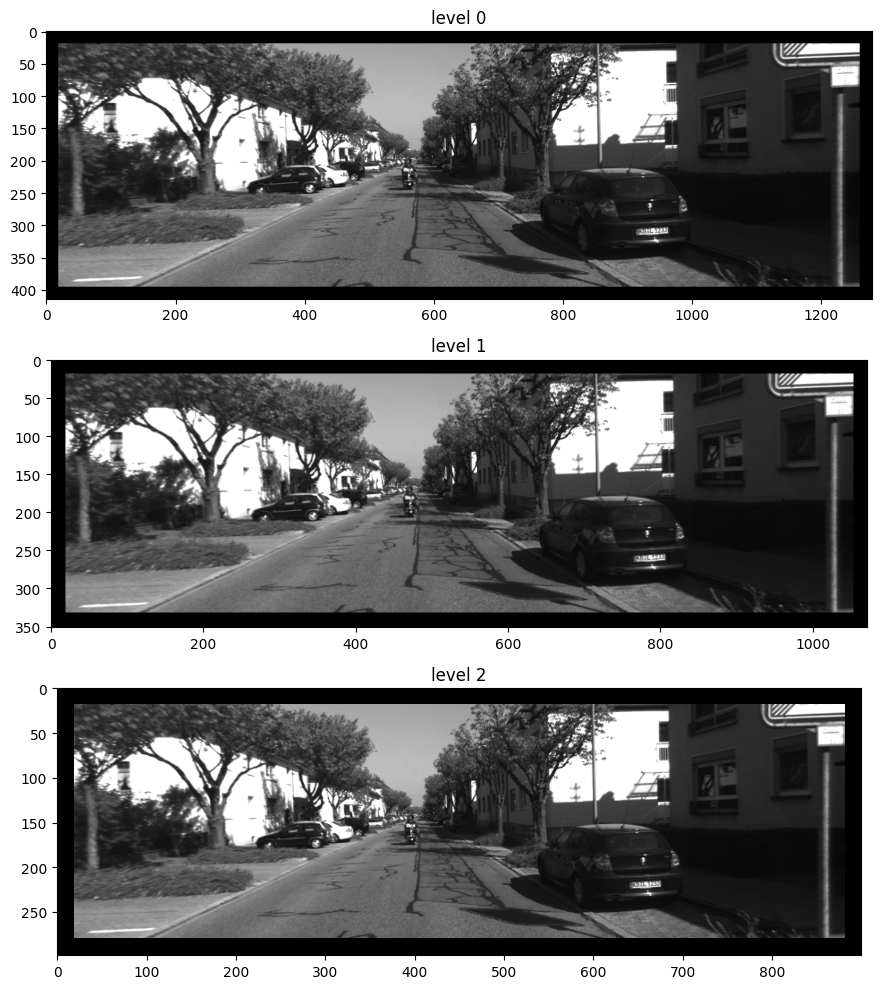

In [12]:
# make border
pyramid_images_border = []

print("edge_threshold:", edge_threshold)
for level in range(pyramid_levels):
    pyramid_image = pyramid_images[level]
    pyramid_image_border = cv2.copyMakeBorder(pyramid_image, edge_threshold, edge_threshold, edge_threshold, edge_threshold, cv2.BORDER_CONSTANT, None, 0)
    pyramid_images_border.append(pyramid_image_border)
    print("pyramid_image_border.shape:", pyramid_image_border.shape)

# Plot
fig, axs = plt.subplots(pyramid_levels, 1, figsize=(15,10))

for i in range(pyramid_levels):
    axs[i].imshow(pyramid_images_border[i], cmap='gray')
    axs[i].set_title(f"level {i}")
plt.tight_layout()
plt.show()

In [33]:
a = [1, 2, 3]
b = a.copy()
b[1] = 5
a

[1, 5, 3]

In [37]:
def features_deepcopy (f):
    return [cv2.KeyPoint(x = k.pt[0], y = k.pt[1], 
            _size = k.size, _angle = k.angle, 
            _response = k.response, _octave = k.octave, 
            _class_id = k.class_id) for k in f]

width: 1247, height: 382, nCols: 35, nRows: 10, wCell: 36, hCell: 39


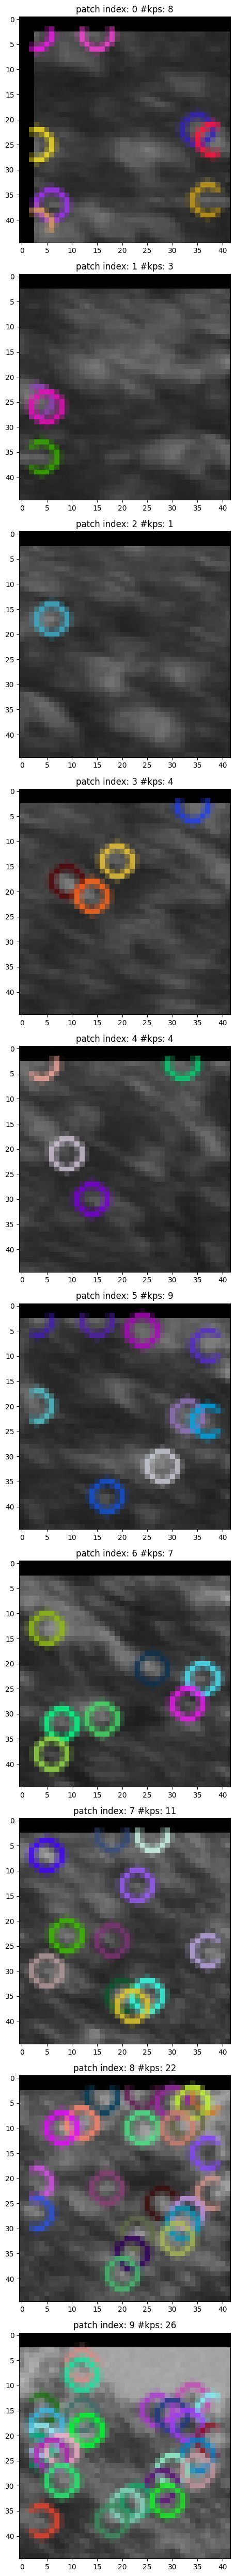

In [105]:
# compute keypoints
w = 35
# pyramid_images_drawn_kps = []
pyramid_image_patches_drawn_kps = []
image_patches = []
image_patch_kps = []
image_kps = []
nodes = []

# for level in range(pyramid_levels):
for level in range(1):
    pyramid_image = pyramid_images_border[level]

    min_border_x = edge_threshold - 3
    min_border_y = min_border_x
    max_border_x = pyramid_image.shape[1] - (edge_threshold-3)
    max_border_y = pyramid_image.shape[0] - (edge_threshold-3)

    width = max_border_x - min_border_x
    height = max_border_y - min_border_y

    nCols = int(width/w)
    nRows = int(height/w)

    wCell = math.ceil(width/nCols)
    hCell = math.ceil(height/nRows)

    print(f"width: {width}, height: {height}, nCols: {nCols}, nRows: {nRows}, wCell: {wCell}, hCell: {hCell}")

    for r in range(nRows):
        ini_y = min_border_y + r*hCell
        max_y = ini_y + hCell + 6
        for c in range(nCols):
            ini_x = min_border_x + c*wCell
            max_x = ini_x + wCell + 6

            image_patch = pyramid_image[ini_y:max_y, ini_x:max_x]
            image_patches.append(image_patch)

            patch_kps = fast.detect(image_patch)
            image_patch_kps.append(patch_kps)


            # 원본 이미지 기준 keypoint 좌표
            patch_kps_image_coordinate = features_deepcopy(patch_kps)
            for kp in patch_kps_image_coordinate:
                kp_x = kp.pt[0]
                kp_y = kp.pt[1]
                kp_x += ini_x
                kp_y += ini_y
                kp.pt = (kp_x, kp_y)
            image_kps.append(patch_kps_image_coordinate)


            node = {'ini_x': ini_x,
                    'max_x': max_x,
                    'ini_y': ini_y,
                    'max_y': max_y,
                    'patch': image_patch,
                    'image_coordinate_kps': patch_kps_image_coordinate,
                    'patch_coordinate_kps': patch_kps
                    }
            nodes.append(node)


            pyramid_image_patch_drawn_kps = cv2.drawKeypoints(image_patch, patch_kps, None)
            pyramid_image_patches_drawn_kps.append(pyramid_image_patch_drawn_kps)
    # pyramid_image_drawn_kps = pyramid_image.copy()
    # pyramid_image_drawn_kps = cv2.drawKeypoints(pyramid_image_drawn_kps, level_kps, None)
    # pyramid_images_drawn_kps.append(pyramid_image_drawn_kps)


# Plot
fig, axs = plt.subplots(10, 1, figsize=(10,50))

for i in range(10):
    axs[i].imshow(pyramid_image_patches_drawn_kps[i], cmap='gray')
    axs[i].set_title(f"patch index: {i} #kps: {len(image_patch_kps[i])}", )
plt.tight_layout()
plt.show()

In [101]:
len(nodes)

350

In [102]:
# 모든 level에 대해 반복해야 함
max_features = 2000
new_nodes = []
node_patches = image_patches.copy()
node_kps = image_kps.copy()

# 노드가 max_features 이상 혹은 노드가 더 늘지 않을 때까지 반복

for i in range(len(nodes)):
    node = nodes[i]
    image_patch = node['patch']

    mid_y = image_patch.shape[0]//2
    max_y = image_patch.shape[0]
    mid_x = image_patch.shape[1]//2
    max_x = image_patch.shape[1]

    # 이미지 패치를 4분할
    patch_ul = image_patch[0:mid_y, 0:mid_x]
    patch_ur = image_patch[0:mid_y, mid_x:max_x]
    patch_bl = image_patch[mid_y:max_y, 0:mid_x]
    patch_br = image_patch[mid_y:max_y, mid_x:max_x]

    # 이미지 기준 위치
    ul_image = (node['ini_x'], node['ini_y'])
    br_image = (node['max_x'], node['max_y'])
    mid_image = (node['ini_x']+mid_x, node['ini_y']+mid_y)


    # keypoint가 존재하는 patch만 살림
    node_img_kps_list = [[] for _ in range(4)]
    node_patch_kps_list = [[] for _ in range(4)]

    node_ul = {'ini_x': ul_image[0],
               'ini_y': ul_image[1],
               'max_x': mid_image[0],
               'max_y': mid_image[1],
               'patch': patch_ul,
               'image_coordinate_kps': [],
               'patch_coordinate_kps': []}
    node_ur = {'ini_x': mid_image[0],
               'ini_y': ul_image[1],
               'max_x': br_image[0],
               'max_y': mid_image[1],
               'patch': patch_ur,
               'image_coordinate_kps': [],
               'patch_coordinate_kps': []}
    node_bl = {'ini_x': ul_image[0],
               'ini_y': mid_image[1],
               'max_x': mid_image[0],
               'max_y': br_image[1],
               'patch': patch_bl,
               'image_coordinate_kps': [],
               'patch_coordinate_kps': []}
    node_br = {'ini_x': mid_image[0],
               'ini_y': mid_image[1],
               'max_x': br_image[0],
               'max_y': br_image[1],
               'patch': patch_br,
               'image_coordinate_kps': [],
               'patch_coordinate_kps': []}
    
    for k in range(len(node['image_coordinate_kps'])):
        img_kp = node['image_coordinate_kps'][k]
        patch_kp = node['patch_coordinate_kps'][k]

        if img_kp.pt[1] < mid_image[1]:
            if img_kp.pt[0] < mid_image[0]:
                node_img_kps_list[0].append(img_kp)  # up left
                node_patch_kps_list[0].append(patch_kp)
            else:
                node_img_kps_list[1].append(img_kp)  # up right
                patch_kp.pt = (patch_kp.pt[0]-mid_x, patch_kp.pt[1])
                node_patch_kps_list[1].append(patch_kp)
        else:
            patch_kp.pt = (patch_kp.pt[0], patch_kp.pt[1]-mid_y)
            if img_kp.pt[0] < mid_image[0]:
                node_img_kps_list[2].append(img_kp)  # bottom left
                node_patch_kps_list[2].append(patch_kp)
            else:
                patch_kp.pt = (patch_kp.pt[0]-mid_x, patch_kp.pt[1])
                node_img_kps_list[3].append(img_kp)  # bottom right
                node_patch_kps_list[3].append(patch_kp)


    node_ul['image_coordinate_kps'] = node_img_kps_list[0]
    node_ur['image_coordinate_kps'] = node_img_kps_list[1]
    node_bl['image_coordinate_kps'] = node_img_kps_list[2]
    node_br['image_coordinate_kps'] = node_img_kps_list[3]
    node_ul['patch_coordinate_kps'] = node_patch_kps_list[0]
    node_ur['patch_coordinate_kps'] = node_patch_kps_list[1]
    node_bl['patch_coordinate_kps'] = node_patch_kps_list[2]
    node_br['patch_coordinate_kps'] = node_patch_kps_list[3]

    new_nodes.append(node_ul)
    new_nodes.append(node_ur)
    new_nodes.append(node_bl)
    new_nodes.append(node_br)




# 노드에서 가장 response가 큰 keypoint만 살림

16 16 37 38
37 16 58 38
16 38 37 61
37 38 58 61


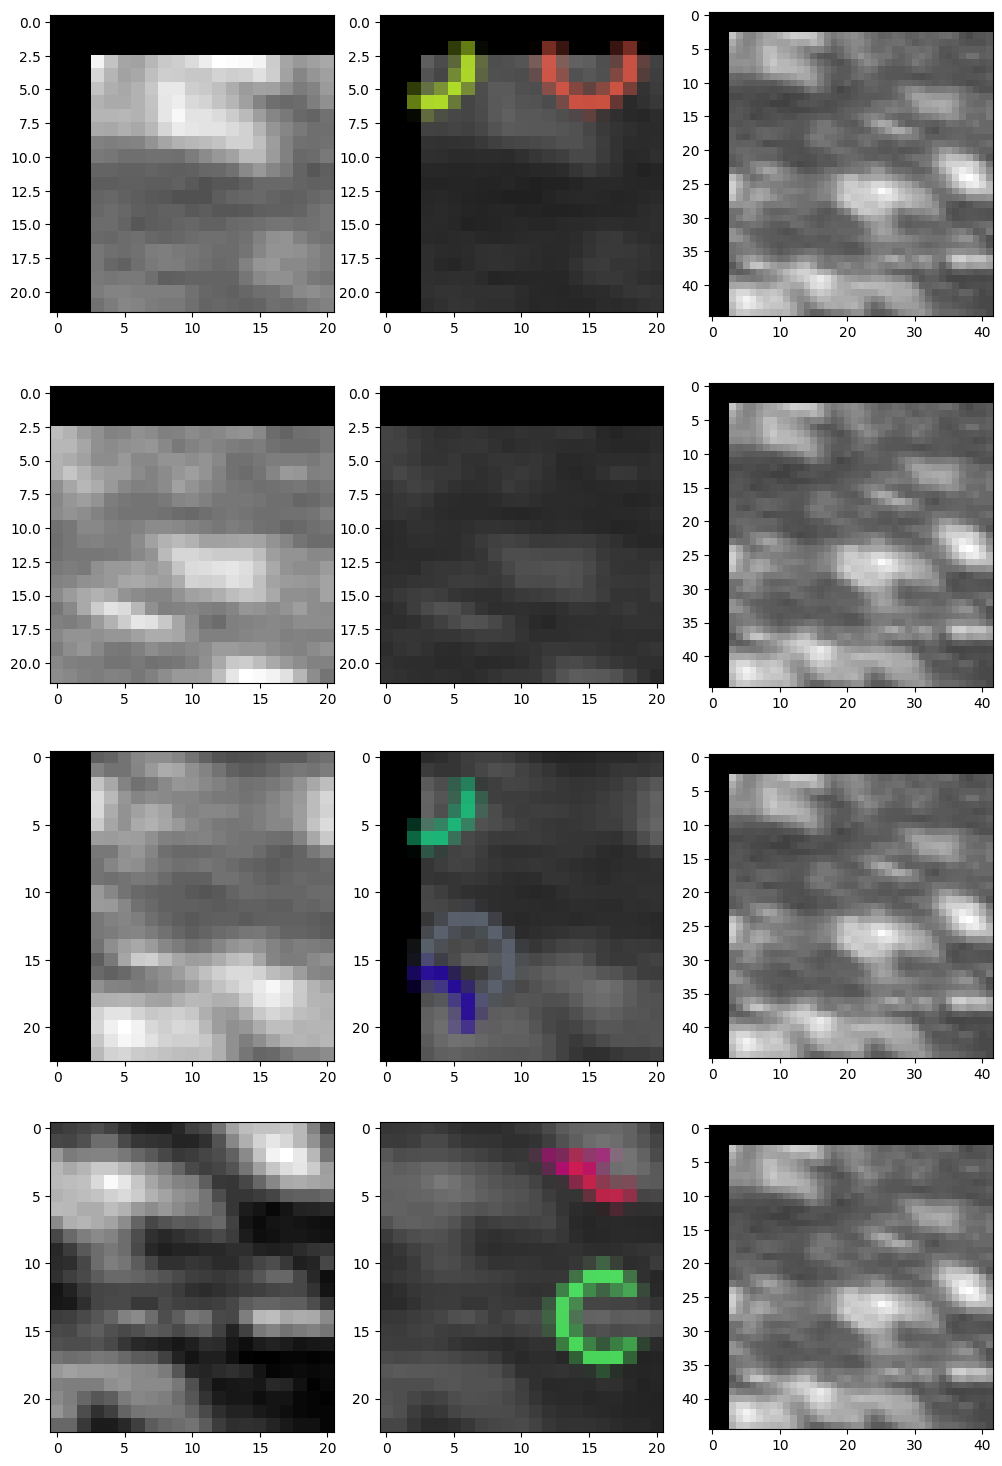

In [103]:
fig, axs = plt.subplots(4, 3, figsize=(10, 15))

for i in range(4):
    n = new_nodes[i]
    print(n['ini_x'], n['ini_y'], n['max_x'], n['max_y'])

    axs[i,0].imshow(n['patch'], cmap='gray')

    img = n['patch']
    kps = n['patch_coordinate_kps']
    # print(kps[0].pt)

    img_kps = cv2.drawKeypoints(img, kps, None)
    axs[i,1].imshow(img_kps)

for j in range(4):
    axs[j,2].imshow(nodes[0]['patch'], cmap='gray')

plt.tight_layout()
plt.show()

3
(3.0, 3.0)
(19.0, 41.0)
(6.0, 15.0)
(22.0, 53.0)
(3.0, 19.0)
(19.0, 57.0)


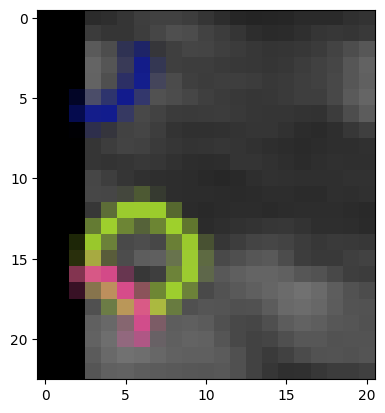

In [104]:
# print(new_nodes[0]['image_coordinate_kps'][0].pt)
img = new_nodes[2]['patch']
kps = new_nodes[2]['patch_coordinate_kps']
i_kps = new_nodes[2]['image_coordinate_kps']
img_kps = cv2.drawKeypoints(img, kps, None)

print(len(kps))
for i in range(len(kps)):
    print(kps[i].pt)
    print(i_kps[i].pt)

plt.imshow(img_kps)
plt.show()
# print(new_nodes[0]['patch_coordinate_kps'][0].pt)

image_temp_kps size: 3285


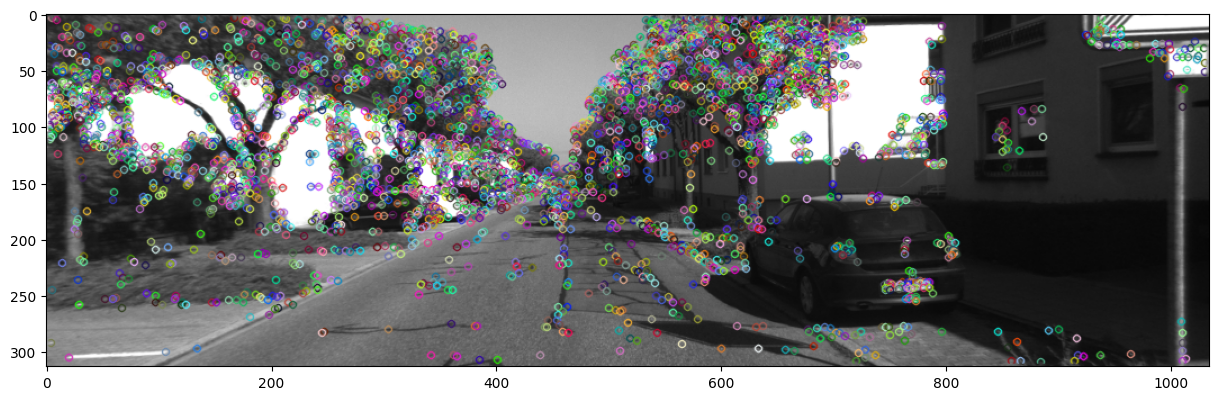

In [19]:
image_temp_kps = fast.detect(image_temp)
print("image_temp_kps size:", len(image_temp_kps))

kps_drawn_image_temp = cv2.drawKeypoints(image_temp, image_temp_kps, None)

plt.figure(figsize=(15,10))
plt.imshow(kps_drawn_image_temp)
plt.show()